# Task 2 : Supervised Machine Learning

Aim:
To predict the percentage of marks that a student is expected to score based upon the
number of hours they studied.

In [ ]:
**Importing Required Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading Data from Remote Link**

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Checking the Data Parameters**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


**Checking for Null Values**

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Distribution of Variables in the Dataset**

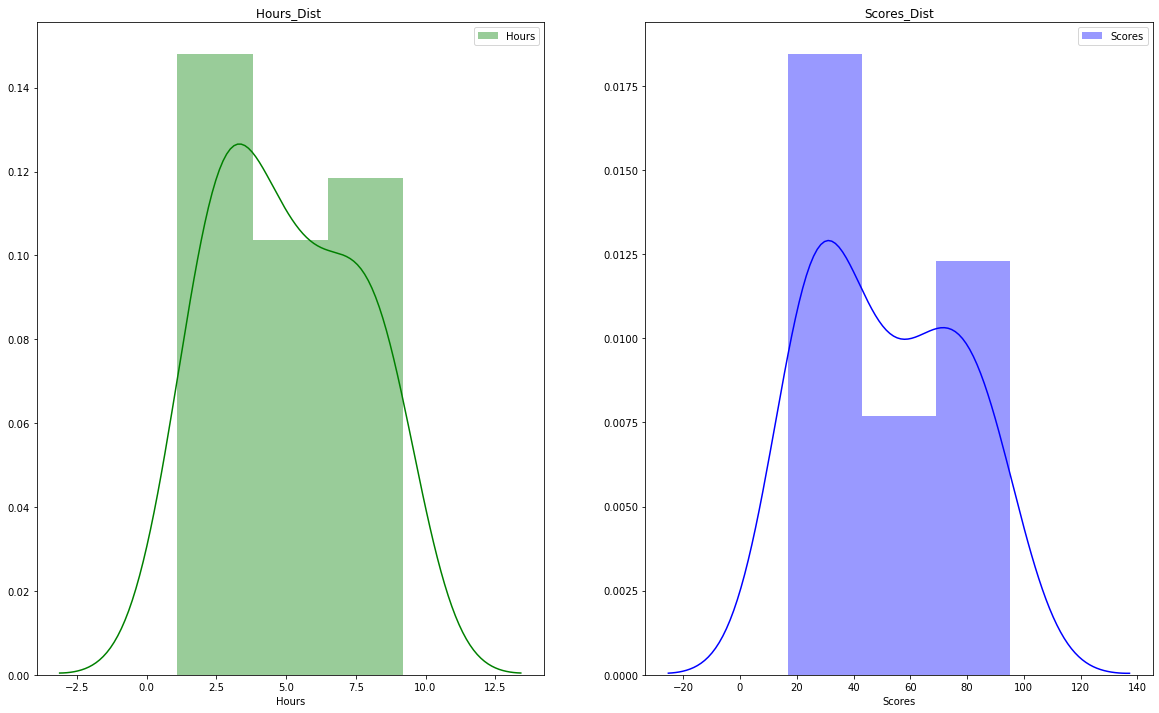

In [6]:
graph=plt.figure(figsize=(20,12))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours_Dist ')
g2.set_title('Scores_Dist')
p1=sns.distplot(data['Hours'],label='Hours',ax=g1,color='green')
p2=sns.distplot(data['Scores'],label='Scores',ax=g2,color='blue')
p1.legend()
p2.legend()

**Using Visualisation to find relationship between Variables**
plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

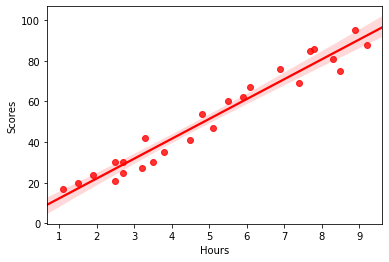

In [7]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='r')

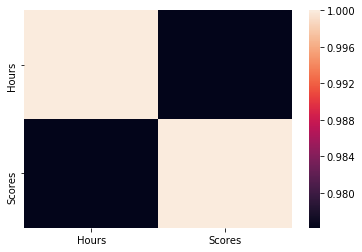

In [8]:
corr=data.corr()
sns.heatmap(corr)

**From the graph and Heat map above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score**

**Preparing the Data**

split the dataset into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1]
y=data.iloc[:, 1]

**Splitting data into Training and Test sets**

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

**Using Linear Regression Model**

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the regression line**

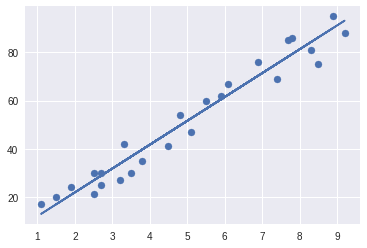

In [ ]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predictions Using Model**

In [16]:
pred=model.predict(X_test)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing The Actual v/s Predicted Values**

In [17]:
check=pd.DataFrame({'Actual':y_test})
check.reset_index(drop=True,inplace=True)
check['Predicted']=pred
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


**Visulaizing The Deviation in Actual & Predicted Values**

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

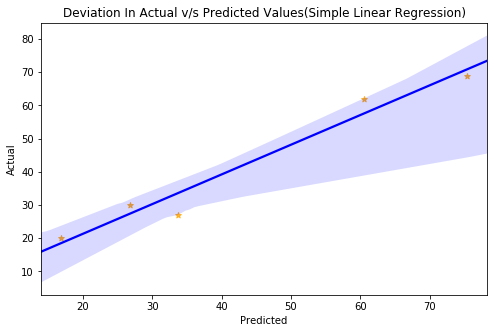

In [20]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'blue'},scatter_kws={'color':'orange'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

**Evaluating The Model Accuracy Using Mean Absolute Error**

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(pred,y_test)
RMSE=np.sqrt(mean_squared_error(y_test,pred))
print('Mean Absolute error in Model :',MAE.round(2))
print('Root Mean Squared Error in Model :',RMSE.round(2))

Mean Absolute error in Model : 4.18
Root Mean Squared Error in Model : 4.65


**Enter the no.of hours to find your expected score**

In [27]:
n=float(input())
result=model.predict([[n]])
print("After studying for {} hours, Your Expected Score is {}".format(n,result.round(2)))

 9.25


After studying for 9.25 hours, Your Expected Score is [93.69]
